## Datasets with Seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np

In [2]:
sns.set_theme(context="notebook", style="darkgrid", palette="deep", font="sans-serif")

## Penguins dataset

In [19]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### How can we tell penguin species apart?

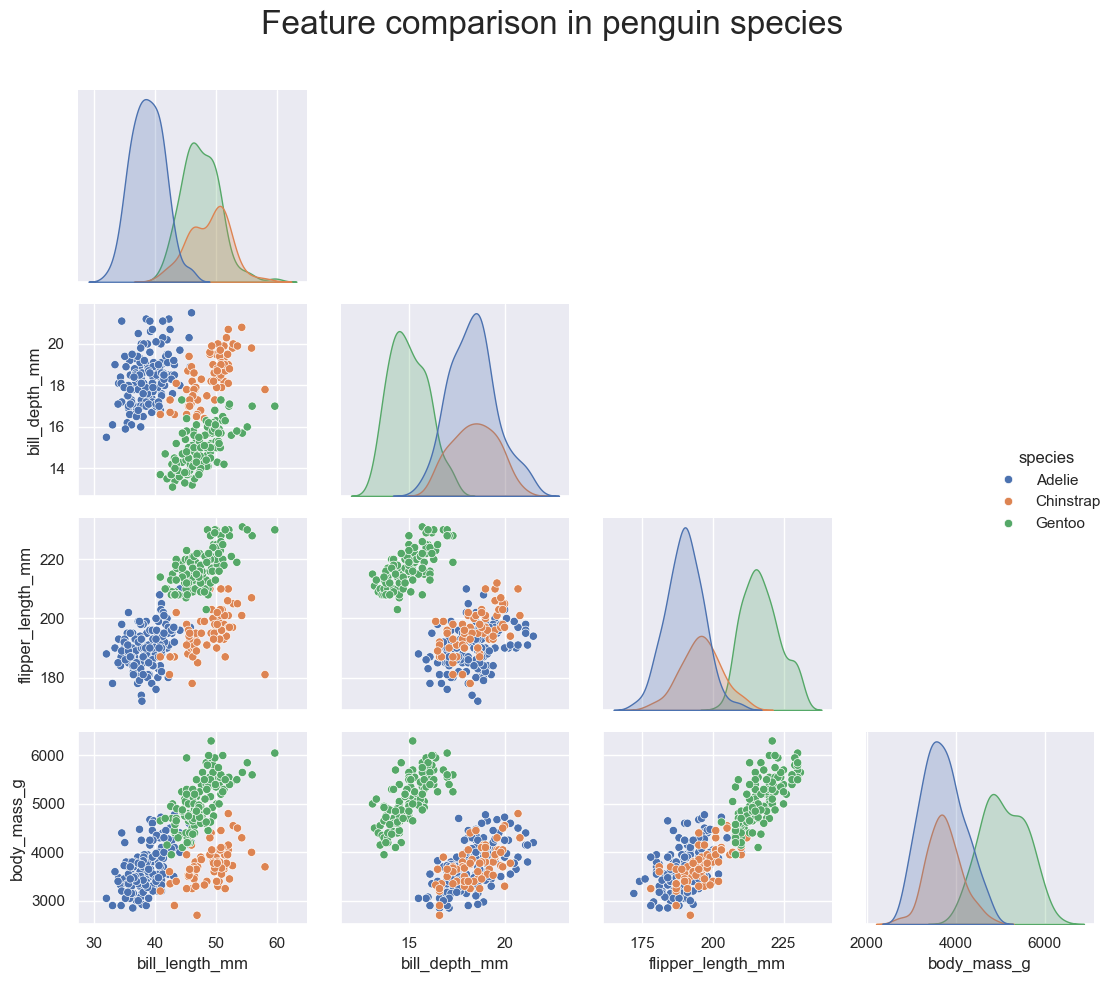

In [ ]:
grid = sns.pairplot(data=penguins, hue="species", corner=True)
grid.figure.suptitle("Feature comparison in penguin species", size=24)

plt.tight_layout()
grid.figure.subplots_adjust(top=.9)

### Jointplot

In [22]:
penguins.dropna(inplace=True)

penguins["demography"] = penguins.apply(lambda row: "%s_%s" % (row["species"], row["sex"]), axis=1)

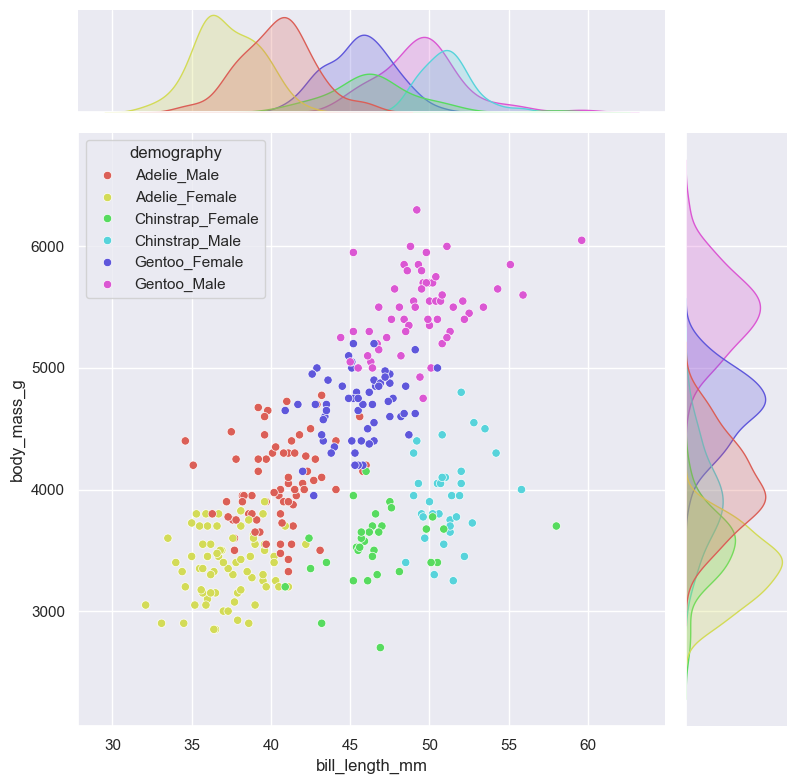

In [23]:
sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue="demography",
              kind="scatter", palette="hls", height=8)

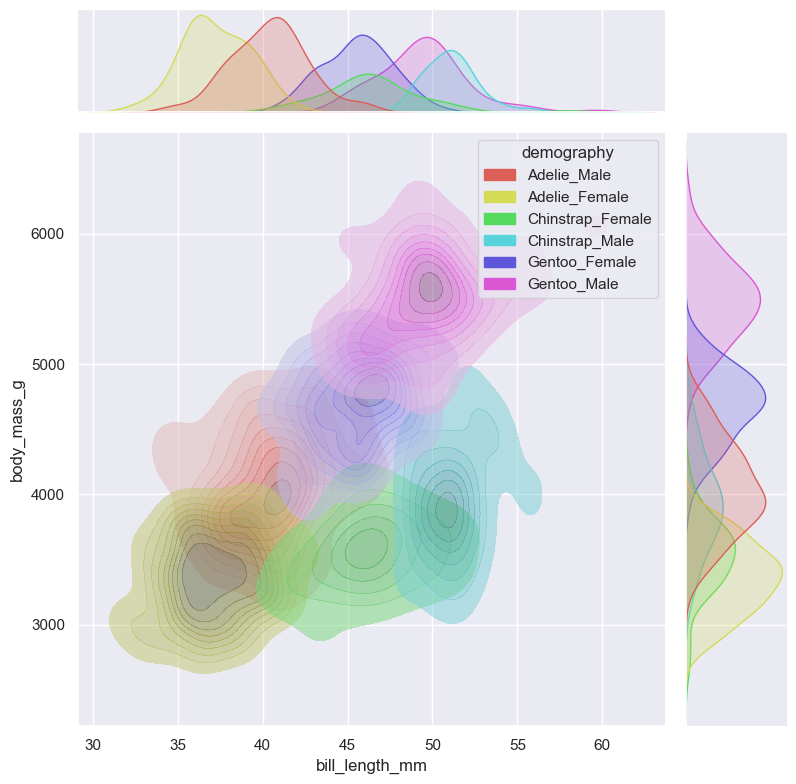

In [26]:
sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue="demography",
              kind="kde", alpha=.5, fill=True, palette="hls", height=8)

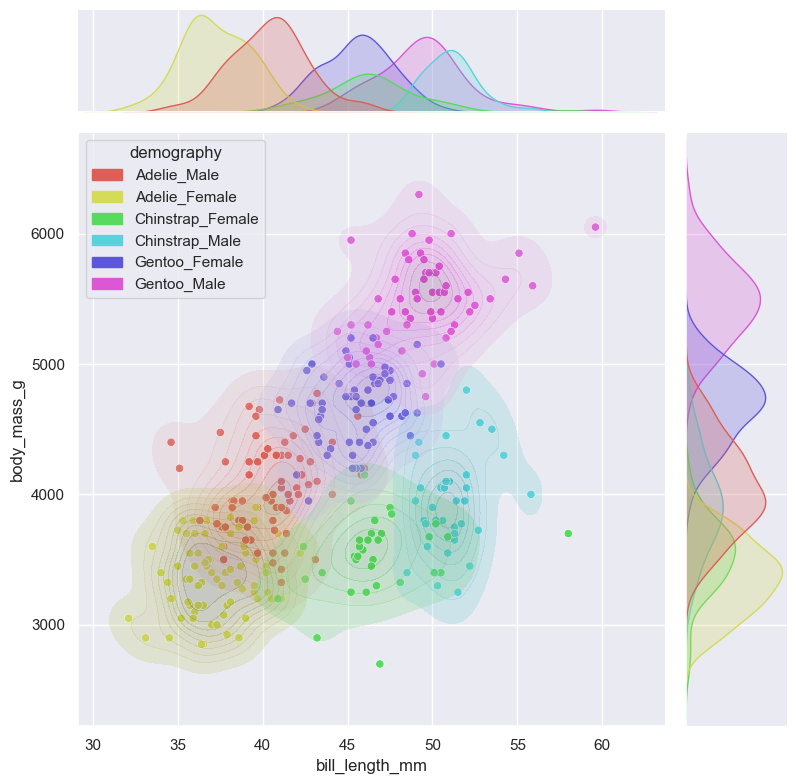

In [36]:
joint_grid = sns.jointplot(data=penguins, x="bill_length_mm", y="body_mass_g", hue="demography",
              kind="scatter", palette="hls", height=8)
joint_grid.plot_joint(sns.kdeplot, fill=True, alpha=.25)

## Flights dataset

In [ ]:
flights = sns.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### In Wide data format

In [ ]:
flights_wide = flights.pivot_table(values="passengers", index="month", columns="year")
flights_wide.head()

C:\Users\Vizsy.Istvan\AppData\Local\Temp\ipykernel_15476\2375578467.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights_wide = flights.pivot_table(values="passengers", index="month", columns="year")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0


Text(0.5, 1.0, 'Flight evolution per Month/Year')

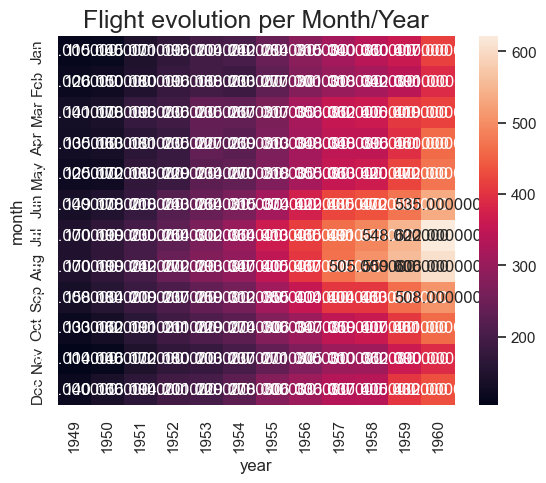

In [ ]:
ax = sns.heatmap(flights_wide, annot=True, fmt="f")
ax.set_title("Flight evolution per Month/Year", size=18)